Codigo para visualizar un AVL despues de cada insercion:

In [ ]:
import graphviz
from IPython.display import display_svg, SVG, display

class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
        self.height=1+max(izq.height,der.height)

    def right_rotation(self):
        return(Nodoi(self.izq.izq,
                     self.izq.info,
                     Nodoi(self.izq.der,self.info,self.der)))
    
    def left_rotation(self):
        return(Nodoi(Nodoi(self.izq,self.info,self.der.izq),
                     self.der.info,
                     self.der.der))
        
    def insert(self,x):
        assert x!=self.info
        if x<self.info:
            p=Nodoi(self.izq.insert(x),self.info,self.der)
            if p.izq.height>p.der.height+1:
                if x<p.izq.info: # inserción exterior
                    p=p.right_rotation()
                else: # inserción interior
                    p=Nodoi(p.izq.left_rotation(),p.info,p.der).right_rotation()           
        else: # x>self.info, simétrico del anterior
            p=Nodoi(self.izq,self.info,self.der.insert(x))
            if p.der.height>p.izq.height+1:
                if x>p.der.info: # inserción exterior
                    p=p.left_rotation()
                else: # inserción interior
                    p=Nodoi(p.izq,p.info,p.der.right_rotation()).left_rotation()         
        return p
        
    def __str__(self):
        return "("+self.izq.__str__()+str(self.info)+self.der.__str__()+")"

    def draw(self,display):
      self.izq.draw(display)
      self.der.draw(display)
      display.node(repr(self),str(self.info))
      display.edge(repr(self),repr(self.izq))
      display.edge(repr(self),repr(self.der))

class Nodoe:
    def __init__(self):
        self.height=0
    
    def insert(self,x):
        return Nodoi(Nodoe(),x,Nodoe())
    
    def __str__(self):
        return "☐"

    def draw(self,display):
      display.node(repr(self),str(self))

class ArbolAVL:
  def __init__(self,raiz=Nodoe()):
    self.raiz=raiz     

  def draw(self):
    display = graphviz.Digraph()
    display.format = 'svg'
    if self.raiz == None:
      display.node("Empty Tree")
    else:
      self.raiz.draw(display)
    svg = display.pipe().decode('utf-8')
    return SVG(svg)        

  def insert(self,x):
    self.raiz=self.raiz.insert(x)
    return self.draw()
    
  def __str__(self):        
    return self.raiz.__str__()

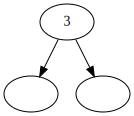

In [ ]:
a = ArbolAVL()
a.insert(3)

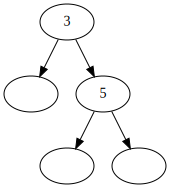

In [ ]:
a.insert(5)

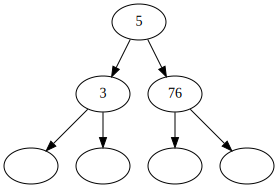

In [ ]:
a.insert(76)

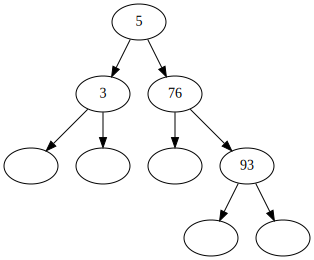

In [ ]:
a.insert(93)

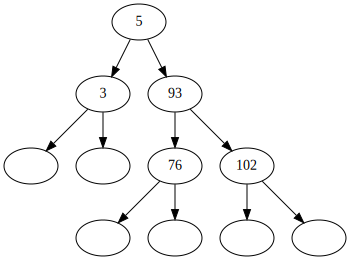

In [ ]:
a.insert(102)

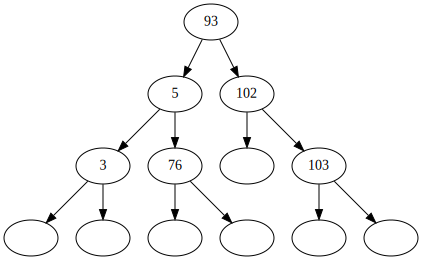

In [ ]:
a.insert(103)